#  <font color=blue>__Exploratory Data Analysis (EDA) Project__ </font>

### 1.  __Data Loading and Preparation__

In [1]:
# imported some importent libreries, having different functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset 
df = pd.read_csv('dataset1.csv', encoding = 'unicode_escape')

In [3]:
# The info() function will give concise summary of dataset including number of rows and columns.
# it will also include the type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Columns: 142 entries, uniqueid to adblue_level
dtypes: float64(123), int64(13), object(6)
memory usage: 20.0+ MB


In [4]:
#It will display the first few rows of dataset, by default 5 rows. We can specify the number of rows as parameter
df.head()

,uniqueid,ts,lat,lng,external_bat_voltage,internal_bat_voltage,engineload,tanklevel,throttle,coolant,...,live_location,to_be_expired_at,status,event_id,particulated_trap_inlet_pressure,boost_pressure,intake_manifold_1_temperature,air_inlet_pressure,exhaust_gas_temperature,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,NaN,NaN,28,NaN,NaN,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,it_220403501,1709340794,19.069347,78.355141,NaN,NaN,22,NaN,NaN,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,it_220403501,1709340857,19.069414,78.355179,NaN,NaN,25,NaN,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,it_220403501,1709340920,19.069258,78.355225,NaN,NaN,35,NaN,NaN,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,it_220403501,1709340983,19.069094,78.355339,NaN,NaN,0,NaN,NaN,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# It will helpfull in detecting the missing values.
# When it gives True, means there is null value
df.isnull()

,uniqueid,ts,lat,lng,external_bat_voltage,internal_bat_voltage,engineload,tanklevel,throttle,coolant,...,live_location,to_be_expired_at,status,event_id,particulated_trap_inlet_pressure,boost_pressure,intake_manifold_1_temperature,air_inlet_pressure,exhaust_gas_temperature,adblue_level
0,False,False,False,False,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18429,False,False,False,False,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,False
18430,False,False,False,False,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,False
18431,False,False,False,False,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,False
18432,False,False,False,False,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,False


In [6]:
# It will count the total number of missing values in each column
df.isnull().sum()

uniqueid                             0
ts                                   0
lat                                  0
lng                                  0
external_bat_voltage             18434
                                 ...  
boost_pressure                   18434
intake_manifold_1_temperature    18434
air_inlet_pressure               18434
exhaust_gas_temperature          18434
adblue_level                      3664
Length: 142, dtype: int64

### __2. Data Cleaning and Preprocessing__
__Handling Missing Values__

In [7]:
# For backup
df_orginal = df.copy()

In [8]:
#By using dropna method, it will delete the column which has missing  values, when 'axis = 1' parameter is given.
#It will delete only those column which has all null value, by using "how = 'all'" parameter
df_update = df.dropna(axis = 1, how = 'all')

In [9]:
#before using .loc[], it was giving 'SettingWithCopyWarning' error. 
#To avoid the error, I have used '.loc' accessor
# the 'adblue_level' column will be updated by using 'fillna()' method
#and fill the mean of the column into the NaN cells of the same column by using mean() method
df_update.loc[:, 'adblue_level'] =  df_update['adblue_level'].fillna(df_update['adblue_level'].mean())

In [10]:
# the 'fuel_level' and 'runtime' columns have very few null values, and it will be updated in the same way as above.
df_update.loc[:, 'fuel_level'] = df_update['fuel_level'].fillna(df_update['fuel_level'].median())
df_update.loc[:, 'runtime'] = df_update['runtime'].fillna(df_update['runtime'].mean())

In [11]:
# After deleting the columns and filling the NaN cells, checking the number of columns and rows by using info() method.
# Now, there is no missing values left
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   uniqueid                              18434 non-null  object 
 1   ts                                    18434 non-null  int64  
 2   lat                                   18434 non-null  float64
 3   lng                                   18434 non-null  float64
 4   engineload                            18434 non-null  int64  
 5   coolant                               18434 non-null  int64  
 6   engineoiltemp                         18434 non-null  float64
 7   vehiclespeed                          18434 non-null  float64
 8   rpm                                   18434 non-null  float64
 9   obddistance                           18434 non-null  int64  
 10  runtime                               18434 non-null  float64
 11  engine_torque_p

There was total 141 column, in which 108 column have all null values. and out of the rest 33 column, 3 column have very few null values that was filled by using mean and median of the data. The 3 column was adblue_level, fuel_level, and runtime. now there is no missing values.

__Converting Data Types__

In [12]:
df1 = df_update

In [13]:
# To enlist all the varaibles
df1.columns

Index(['uniqueid', 'ts', 'lat', 'lng', 'engineload', 'coolant',
       'engineoiltemp', 'vehiclespeed', 'rpm', 'obddistance', 'runtime',
       'engine_torque_percent', 'selected_gear', 'current_gear',
       'fuel_consumption', 'fuel_level', 'fl_level', 'Unnamed: 32',
       'fuel_rate', 'fuel_economy', 'accelerator_pedal_pos', 'pluscode',
       'vibration_status', 'can_raw_data', 'engine_throttle_valve1_pos',
       'engine_throttle_valve2_pos', 'enginefueltemp',
       'drivers_demand_engine_torque_percent', 'engine_torque_mode',
       'accelerator_pedal_pos_2', 'brake_switch_status',
       'clutch_switch_status', 'parking_switch_status', 'adblue_level'],
      dtype='object')

In [15]:
# Converting time stamp, which was in epoch format, to current datetime format by using 'to_datetime()' method
df1.loc[:, 'datetime'] = pd.to_datetime(df1['ts'], unit='s')

In [16]:
df1.head()

,uniqueid,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,...,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level,datetime
0,it_220403501,1709340731,19.069340,78.355148,28,33,1774.9688,0.00000,749.000,60780800,...,102,215,0,1,102,Released,Released,Pressed,84.795315,2024-03-02 00:52:11
1,it_220403501,1709340794,19.069347,78.355141,22,41,1774.9688,0.00000,1208.375,60780800,...,102,215,19,2,102,Released,Pressed,Pressed,84.795315,2024-03-02 00:53:14
2,it_220403501,1709340857,19.069414,78.355179,25,48,1774.9688,1.40625,752.625,60780800,...,102,215,0,1,102,Pressed,Pressed,Released,84.795315,2024-03-02 00:54:17
3,it_220403501,1709340920,19.069258,78.355225,35,52,1774.9688,2.81250,996.375,60780820,...,102,215,28,2,102,Released,Pressed,Released,84.795315,2024-03-02 00:55:20
4,it_220403501,1709340983,19.069094,78.355339,0,57,1774.9688,4.53125,1065.750,60780840,...,102,215,1,2,102,Released,Pressed,Released,84.795315,2024-03-02 00:56:23


In [17]:
df1.describe()

,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,runtime,...,accelerator_pedal_pos,vibration_status,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,adblue_level,datetime
count,1.843400e+04,18434.000000,18434.000000,18434.000000,18434.000000,1.843400e+04,18434.000000,18434.000000,1.843400e+04,18434.000000,...,18434.000000,18434.0,18434.000000,18434.0,18434.0,18434.000000,18434.000000,18434.0,18434.000000,18434
mean,1.711641e+09,18.724254,78.865351,38.141206,84.571336,1.774969e+03,33.361762,937.044090,6.650076e+07,2132.411732,...,34.954519,0.0,99.657546,102.0,215.0,28.044483,4.983780,102.0,84.795315,2024-03-28 15:57:22.896169984
min,1.709341e+09,0.000000,0.000000,0.000000,30.000000,1.774969e+03,0.000000,0.000000,6.078080e+07,1970.850000,...,0.000000,0.0,21.200000,102.0,215.0,0.000000,1.000000,102.0,44.400000,2024-03-02 00:52:11
25%,1.710903e+09,18.701308,78.758909,10.000000,83.000000,1.774969e+03,22.359375,757.250000,6.373487e+07,2053.362500,...,0.000000,0.0,100.000000,102.0,215.0,0.000000,1.000000,102.0,78.800000,2024-03-20 02:42:02
50%,1.711692e+09,18.853032,79.092408,31.000000,85.000000,1.774969e+03,38.187500,950.812500,6.653239e+07,2133.000000,...,32.800000,0.0,100.000000,102.0,215.0,23.000000,2.000000,102.0,84.795315,2024-03-29 06:00:18
75%,1.712682e+09,18.921385,79.352821,64.000000,89.000000,1.774969e+03,47.011719,1157.500000,6.940603e+07,2213.750000,...,68.400000,0.0,100.000000,102.0,215.0,56.000000,9.000000,102.0,99.200000,2024-04-09 17:01:00.500000
max,1.713636e+09,19.069500,79.481804,100.000000,98.000000,1.774969e+03,81.703125,2011.250000,7.187482e+07,2287.100000,...,100.000000,0.0,100.000000,102.0,215.0,83.000000,15.000000,102.0,100.000000,2024-04-20 18:02:00
std,1.275937e+06,0.816184,3.208032,29.889358,7.718346,4.547597e-13,17.929579,327.003819,3.256334e+06,92.419179,...,34.994579,0.0,3.934917,0.0,0.0,28.824737,5.249083,0.0,13.937972,NaN


There is a column of time stamp, which is in the epoch format. for better analysis, the time stamp is converted to datetime format.

__Detecting and handling Outliers__

In [18]:
# we are using standard deviation method to detect outliers
#importing statistics library to get the standard deviation and mean of the data
import statistics

In [19]:
# Defining the function to detect the outliers
def find_outliers(data):
    #assigning the empty list to anomalies to accumulating the outliers
    anomalies = []

    # Getting the value of standard deviation (S.D.) and mean
    std = statistics.stdev(data)
    mean = statistics.mean(data)
    
    anomaly_cutoff = 3 * std
    # Set the upper limit and lower limit to 3 S.D.
    lower_limit = mean - anomaly_cutoff
    upper_limit = mean + anomaly_cutoff

    # Generating the outliers
    for item in data:
        if item > upper_limit or item < lower_limit:
            anomalies.append(item)
    return anomalies

_Detecting the outlier of coolant data_

In [20]:
coolant_outlier = find_outliers(df1['coolant'])

In [21]:
len(coolant_outlier)


641

In [22]:
len(df1['coolant'])

18434

In [23]:
df1.coolant.skew()

np.float64(-2.893601454130376)

By using standard deviation method, total 641 coolant values out of 18434 entities are outlier. which makes nearly 3.4%.
Skewness is negative here, means the bulk of the data values (higher frequency) are concentrated on the right side of the distribution, with fewer values stretching out towards the left.

Detecting the outlier of engineload data

In [36]:
engineload_outlier = find_outliers(df1['engineload'])
len_out = len('engineload_outlier')
len_tot = len(df1.engineload)
print("the number of outlier in engineload is ", len_out)
print("total number of values ", len_tot)
print("the skewness is ", df1.engineload.skew())
print("the percentage of outlier: ", (len_out / len_tot) * 100, "%")

the number of outlier in engineload is  18
total number of values  18434
the skewness is  0.34508769166390313
the percentage of outlier:  0.0976456547683628 %


Detecting the outlier of rpm data

In [37]:
rpm_outlier = find_outliers(df1['rpm'])
len_out = len('rpm_outlier')
len_tot = len(df1.rpm)
print("the number of outlier in rpm is ", len_out)
print("total number of values ", len_tot)
print("the skewness is ", df1.rpm.skew())
print("the percentage of outlier: ", (len_out / len_tot) * 100, "%")

the number of outlier in rpm is  11
total number of values  18434
the skewness is  -1.016179388653725
the percentage of outlier:  0.05967234458066616 %


Detecting the outlier of fuel economy data

In [38]:
fuel_economy_outlier = find_outliers(df1['rpm'])
len_out = len('fuel_economy_outlier')
len_tot = len(df1.fuel_economy)
print("the number of outlier in fuel_economy is ", len_out)
print("total number of values ", len_tot)
print("the skewness is ", df1.fuel_economy.skew())
print("the percentage of outlier: ", (len_out / len_tot) * 100, "%")

the number of outlier in fuel_economy is  20
total number of values  18434
the skewness is  1.7907583099364364
the percentage of outlier:  0.10849517196484756 %


### __3. Exploratory Data Analysis__

__Univariate Analysis__

Univariating analysis helps us to get insights from individual variables.

In [39]:
# Making a new dataframe containing only those variables which can give valuable insights.
df_new = df1[['datetime', 'engineload', 'coolant', 'adblue_level', 'vehiclespeed', 'rpm', 'obddistance', 'runtime', 'fuel_level', 'fuel_rate', 'fuel_economy', 'brake_switch_status', 'clutch_switch_status']]

In [40]:
df_new.head()

,datetime,engineload,coolant,adblue_level,vehiclespeed,rpm,obddistance,runtime,fuel_level,fuel_rate,fuel_economy,brake_switch_status,clutch_switch_status
0,2024-03-02 00:52:11,28,33,84.795315,0.00000,749.000,60780800,1970.85,23.6,5.30,0.000000,Released,Released
1,2024-03-02 00:53:14,22,41,84.795315,0.00000,1208.375,60780800,1970.85,23.6,6.45,0.000000,Released,Pressed
2,2024-03-02 00:54:17,25,48,84.795315,1.40625,752.625,60780800,1970.85,22.8,4.70,0.337891,Pressed,Pressed
3,2024-03-02 00:55:20,35,52,84.795315,2.81250,996.375,60780820,1970.90,20.4,8.60,0.121094,Released,Pressed
4,2024-03-02 00:56:23,0,57,84.795315,4.53125,1065.750,60780840,1970.90,23.2,0.00,125.500000,Released,Pressed


_Descriptive Statistics for Univariate Analysis_

In [41]:
#describe() method is used to get some important statistics of the dataframe
df_new.describe()

,datetime,engineload,coolant,adblue_level,vehiclespeed,rpm,obddistance,runtime,fuel_level,fuel_rate,fuel_economy
count,18434,18434.000000,18434.000000,18434.000000,18434.000000,18434.000000,1.843400e+04,18434.000000,18434.000000,18434.000000,18434.000000
mean,2024-03-28 15:57:22.896169984,38.141206,84.571336,84.795315,33.361762,937.044090,6.650076e+07,2132.411732,54.994076,9.320809,25.029692
min,2024-03-02 00:52:11,0.000000,30.000000,44.400000,0.000000,0.000000,6.078080e+07,1970.850000,0.400000,0.000000,0.000000
25%,2024-03-20 02:42:02,10.000000,83.000000,78.800000,22.359375,757.250000,6.373487e+07,2053.362500,32.800000,1.850000,1.933594
50%,2024-03-29 06:00:18,31.000000,85.000000,84.795315,38.187500,950.812500,6.653239e+07,2133.000000,57.200000,6.350000,3.456055
75%,2024-04-09 17:01:00.500000,64.000000,89.000000,99.200000,47.011719,1157.500000,6.940603e+07,2213.750000,77.200000,16.850000,20.906250
max,2024-04-20 18:02:00,100.000000,98.000000,100.000000,81.703125,2011.250000,7.187482e+07,2287.100000,100.000000,36.400000,125.500000
std,NaN,29.889358,7.718346,13.937972,17.929579,327.003819,3.256334e+06,92.419179,26.764543,8.205254,43.331629


In [71]:
print("Descriptive statistics for 'engineload' in percentage:")
engineload_filtered = df_new[df_new['engineload'] > 0]
print("The minimum value is: ", min(engineload_filtered.engineload), "%")
print("The maximum value is: ", max(engineload_filtered.engineload), "%")
print("Mean: ", engineload_filtered.engineload.mean())
print("Median: ", engineload_filtered.engineload.median())
print("Mode: ", engineload_filtered.engineload.mode()[0])
print("Standard Deviation: ", engineload_filtered.engineload.std())
print("Skewness: ", engineload_filtered.engineload.skew())

Descriptive statistics for 'engineload' in percentage:
The minimum value is:  1 %
The maximum value is:  100 %
Mean:  45.021130818979316
Median:  44.0
Mode:  10
Standard Deviation:  27.290461278999146
Skewness:  0.25525459073210605


To get better analysis, engine load is filtered on the condition when load is greater than zero.

In [43]:
print("Descriptive statistics for 'coolant' in percentage:")
print("The minimum value is: ", min(df_new.coolant), "%")
print("The maximum value is: ", max(df_new.coolant), "%")
print("Mean: ", df_new.coolant.mean())
print("Median: ", df_new.coolant.median())
print("Mode: ", df_new.coolant.mode()[0])
print("Standard Deviation: ", df_new.coolant.std())
print("Skewness: ", df_new.coolant.skew())

Descriptive statistics for 'coolant' in percentage:
The minimum value is:  30 %
The maximum value is:  98 %
Mean:  84.57133557556689
Median:  85.0
Mode:  84
Standard Deviation:  7.718346258731917
Skewness:  -2.893601454130376


In [44]:
print("Descriptive statistics for 'adblue_level' in percentage:")
print("The minimum value is: ", min(df_new.adblue_level), "%")
print("The maximum value is: ", max(df_new.adblue_level), "%")
print("Mean: ", df_new.adblue_level.mean())
print("Median: ", df_new.adblue_level.median())
print("Mode: ", df_new.adblue_level.mode()[0])
print("Standard Deviation: ", df_new.adblue_level.std())
print("Skewness: ", df_new.adblue_level.skew())

Descriptive statistics for 'adblue_level' in percentage:
The minimum value is:  44.4 %
The maximum value is:  100.0 %
Mean:  84.79531482735274
Median:  84.79531482735274
Mode:  84.79531482735274
Standard Deviation:  13.937971717405135
Skewness:  -0.7906270444371546


In [45]:
# When vehicle speed is zero, it means the vehicle is not moving. and calculating the statistics for immobile vehicle's speed does not make any sense.
# That is why, vehicle speed column is filtered on the condition that speed is greater than zero.
print("Descriptive statistics for 'vehiclespeed' in km/hr when speed is greater than zero:")
df_filtered = df_new[df_new['vehiclespeed'] > 0]
print("The minimum value is: ", df_filtered['vehiclespeed'].min(), "km/hr")
print("The maximum value is: ", df_filtered['vehiclespeed'].max(), "km/hr")
print("Mean: ", df_filtered['vehiclespeed'].mean())
print("Median: ", df_filtered['vehiclespeed'].median())
print("Mode: ", df_filtered['vehiclespeed'].mode()[0])
print("Standard Deviation: ", df_filtered['vehiclespeed'].std())
print("Skewness: ", df_filtered['vehiclespeed'].skew())


Descriptive statistics for 'vehiclespeed' in km/hr when speed is greater than zero:
The minimum value is:  0.015625 km/hr
The maximum value is:  81.703125 km/hr
Mean:  37.96942142063345
Median:  40.71875
Mode:  50.265625
Standard Deviation:  13.817032834590368
Skewness:  -0.6533237756768514


Vehicle speed filtered on the condition that when speed is greater than zero, to get better analysis.

In [59]:
# When rpm is zero, means engine is not started. so making calculations on zero value will not give realistic picture.
print("Descriptive statistics for 'rpm' when it is greater than zero:")
df_filtered1 = df_new[df_new['rpm'] > 0]
print("The minimum value is: ", df_filtered1['rpm'].min())
print("The maximum value is: ", df_filtered1['rpm'].max())
print("Mean: ", df_filtered1['rpm'].mean())
print("Median: ", df_filtered1['rpm'].median())
print("Mode: ", df_filtered1['rpm'].mode()[0])
print("Standard Deviation: ", df_filtered1['rpm'].std())
print("Skewness: ", df_filtered1['rpm'].skew())

Descriptive statistics for 'rpm' when it is greater than zero:
The minimum value is:  49.0
The maximum value is:  2011.25
Mean:  998.4088058493729
Median:  982.0
Mode:  749.625
Standard Deviation:  229.48631625333303
Skewness:  0.5049999263373315


RPM also filtered on the condition that when it is greater than zero, to get better analysis.

In [60]:
# OBD (On-Board Diagnostics) distance refers to the distance traveled by a vehicle as recorded by its OBD system.
# It will helpfull to also calculate the total distance traveled by vehicle in given time period.
print("Descriptive statistics for 'obddistance' in km:")
print("The total distance traveled by vehicle in given time period are: ", (max(df_new.obddistance) - min(df_new.obddistance)) / 1000, "km" )

# Adjusting 'obddistance' to start from zero to maximum distance in kilometer (km)
df_new.loc[:, 'obddistance_adjusted'] = (df_new['obddistance'] - min(df_new['obddistance']))/1000

print("Mean: ", df_new.obddistance_adjusted.mean())
print("Median: ", df_new.obddistance_adjusted.median())
print("Mode: ", df_new.obddistance_adjusted.mode()[0])
print("Standard Deviation: ", df_new.obddistance_adjusted.std())
print("Skewness: ", df_new.obddistance_adjusted.skew())


Descriptive statistics for 'obddistance' in km:
The total distance traveled by vehicle in given time period are:  11094.016 km
Mean:  5719.955568189215
Median:  5751.585999999999
Mode:  10190.104
Standard Deviation:  3256.333528050283
Skewness:  -0.04669466674767112


OBD distance is a distance which travelled by vehicle so far. That is why, it is adjusted to start from zero to get the distance travelled by vehicle in given time period.

In [61]:
# Engine runtime is commonly tracked in hours to monitor usage, schedule maintenance, and assess wear and tear on the engine components.
print("Descriptive statistics for 'runtime' in hr:")
print("The total runtime of vehicle's engine in given time period are: ", (max(df_new.runtime) - min(df_new.runtime)), "hr" )

# Adjusting 'runtime' to start from zero to get better analysis
df_new.loc[:, 'runtime_adjusted'] = (df_new['runtime'] - min(df_new['runtime']))

print("Mean: ", df_new.runtime_adjusted.mean())
print("Median: ", df_new.runtime_adjusted.median())
print("Mode: ", df_new.runtime_adjusted.mode()[0])
print("Standard Deviation: ", df_new.runtime_adjusted.std())
print("Skewness: ", df_new.runtime_adjusted.skew())

Descriptive statistics for 'runtime' in hr:
The total runtime of vehicle's engine in given time period are:  316.25 hr
Mean:  161.56173181324658
Median:  162.1500000000001
Mode:  289.4000000000001
Standard Deviation:  92.41917896653386
Skewness:  -0.031919475500810944


Runtime of an engine refers to the total time the engine has been operating or running. For getting real picture, it is adjusted from zero to get how much the engine run in given period of time.

In [64]:
#Fuel level refers to the amount of fuel present in a vehicle's fuel tank at any given time
# From the data, fuel_level is given in percentage.
print("Descriptive statistics for 'fuel_level' in percentage:")
print("The minimum value is: ", min(df_new.fuel_level), "%")
print("The maximum value is: ", max(df_new.fuel_level), "%")
print("Mean: ", df_new.fuel_level.mean())
print("Median: ", df_new.fuel_level.median())
print("Mode: ", df_new.fuel_level.mode()[0])
print("Standard Deviation: ", df_new.fuel_level.std())
print("Skewness: ", df_new.fuel_level.skew())

Descriptive statistics for 'fuel_level' in percentage:
The minimum value is:  0.4 %
The maximum value is:  100.0 %
Mean:  54.99407616361072
Median:  57.2
Mode:  68.0
Standard Deviation:  26.76454260189818
Skewness:  -0.06759344937333697


In [65]:
# Fuel rate refers to the rate at which a vehicle consumes fuel over time.
print("Descriptive statistics for 'fuel_rate':")
print("The minimum value is: ", min(df_new.fuel_rate))
print("The maximum value is: ", max(df_new.fuel_rate))
print("Mean: ", df_new.fuel_rate.mean())
print("Median: ", df_new.fuel_rate.median())
print("Mode: ", df_new.fuel_rate.mode()[0])
print("Standard Deviation: ", df_new.fuel_rate.std())
print("Skewness: ", df_new.fuel_rate.skew())

Descriptive statistics for 'fuel_rate':
The minimum value is:  0.0
The maximum value is:  36.4
Mean:  9.32080937398286
Median:  6.35
Mode:  0.0
Standard Deviation:  8.20525399400088
Skewness:  0.4971490043593673


In [88]:
# Fuel economy refers to the efficiency with which a vehicle uses fuel, typically measured by the distance traveled per unit of fuel consumed.
# fuel economy when gretaer then zero and less than 20.
# because rest of the data do not make sense in this case.
df_economy_filtered = df_new[(df_new['fuel_economy'] > 0) & (df_new['fuel_economy'] < 20)]
print("Descriptive statistics for 'fuel_economy':")
print("The minimum value is: ", min(df_economy_filtered.fuel_economy))
print("The maximum value is: ", max(df_economy_filtered.fuel_economy))
print("Mean: ", df_economy_filtered.fuel_economy.mean())
print("Median: ", df_economy_filtered.fuel_economy.median())
print("Mode: ", df_economy_filtered.fuel_economy.mode()[0])
print("Standard Deviation: ", df_economy_filtered.fuel_economy.std())
print("Skewness: ", df_economy_filtered.fuel_economy.skew())

Descriptive statistics for 'fuel_economy':
The minimum value is:  0.001953125
The maximum value is:  19.982422
Mean:  4.3299865843229615
Median:  2.6835938
Mode:  1.9785156
Standard Deviation:  4.156679706186412
Skewness:  1.8381597161840475


As fuel economy has very unrealistic data, it is filtered on the condition when economy is greater than zero and less than 20 to get realistic analysis.

In [67]:
# For categorical data
# How many times the brake is pressed or released
# The value_counts() method is a convenient way to get the frequency count of unique values in a column. 
# It is good for categorical data in EDA.
print("Value counts for 'brake_switch_status' :")
print(df_new['brake_switch_status'].value_counts())

Value counts for 'brake_switch_status' :
brake_switch_status
Released    16752
Pressed      1682
Name: count, dtype: int64


In [68]:
# How many times the clutch is pressed or released
print("Value counts for 'clutch_switch_status' :")
print(df_new['clutch_switch_status'].value_counts())

Value counts for 'clutch_switch_status' :
clutch_switch_status
Pressed     15346
Released     3088
Name: count, dtype: int64


In descriptive statistics for each variable, I calculated minimum and maximum value, mean, median, mode, standard deviation and skewness to get better analysis. For some variables to find the mean, median etc do not make sense until columns will not adjusted. for example, obddistance and runtime was the total data since sensor is giving data. so for that I have subtracted min value from each value to start from zero which can give real picture. And also the vehicle speed, RPM, and fuel economy have been filtered to get real analysis.

_Visualizations for Univariate Analysis_

In [69]:
df_new.head()

,datetime,engineload,coolant,adblue_level,vehiclespeed,rpm,obddistance,runtime,fuel_level,fuel_rate,fuel_economy,brake_switch_status,clutch_switch_status,obddistance_adjusted,runtime_adjusted
0,2024-03-02 00:52:11,28,33,84.795315,0.00000,749.000,60780800,1970.85,23.6,5.30,0.000000,Released,Released,0.00,0.00
1,2024-03-02 00:53:14,22,41,84.795315,0.00000,1208.375,60780800,1970.85,23.6,6.45,0.000000,Released,Pressed,0.00,0.00
2,2024-03-02 00:54:17,25,48,84.795315,1.40625,752.625,60780800,1970.85,22.8,4.70,0.337891,Pressed,Pressed,0.00,0.00
3,2024-03-02 00:55:20,35,52,84.795315,2.81250,996.375,60780820,1970.90,20.4,8.60,0.121094,Released,Pressed,0.02,0.05
4,2024-03-02 00:56:23,0,57,84.795315,4.53125,1065.750,60780840,1970.90,23.2,0.00,125.500000,Released,Pressed,0.04,0.05


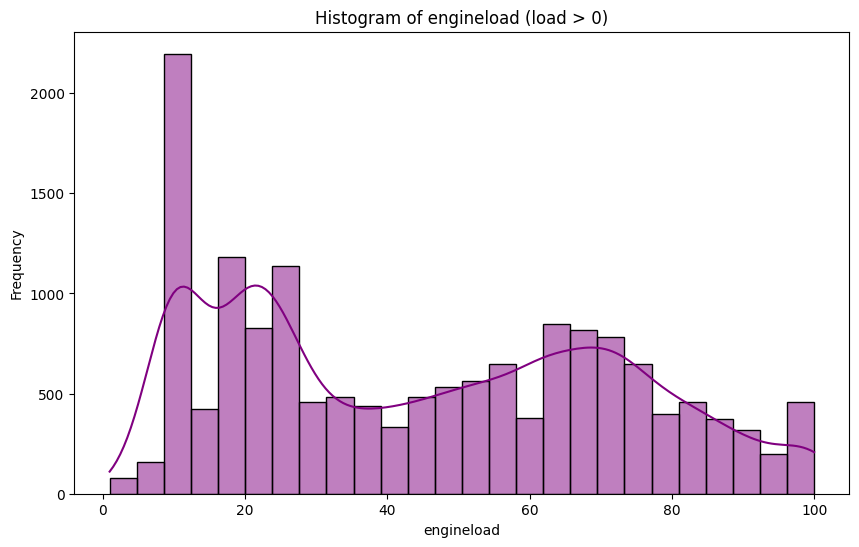

In [107]:
# Generating histogram for 'engineload' variable.
plt.figure(figsize=(10, 6))
sns.histplot(engineload_filtered.engineload, kde = True, color= 'purple')
plt.title('Histogram of engineload (load > 0)')
plt.xlabel('engineload')
plt.ylabel('Frequency')
plt.show()


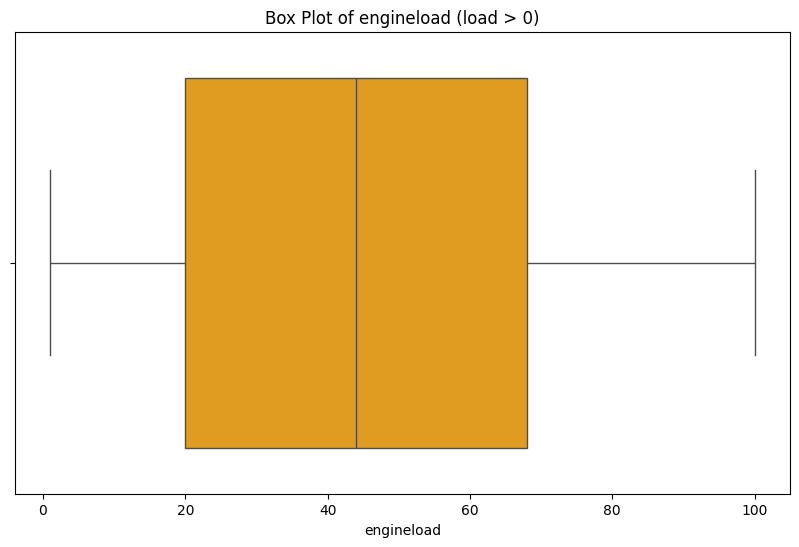

In [108]:
# Generating box plot for 'engineload'
plt.figure(figsize=(10, 6))
sns.boxplot(x = engineload_filtered.engineload, color= 'orange')
plt.title('Box Plot of engineload (load > 0)')
plt.xlabel('engineload')
plt.show()

From the histogram of engine load, we can conclude that most of the value lies between 0 and 30. and most importantly, the higher frequency of value is 10. and frequency for rest of the values forms very smooth curve.
From the box plot of the engine load, we can conclude that half of the values is bellow nearly 45% and it is also seen from the plot that 50 percent data is between nearly 20% and 70% engine load.

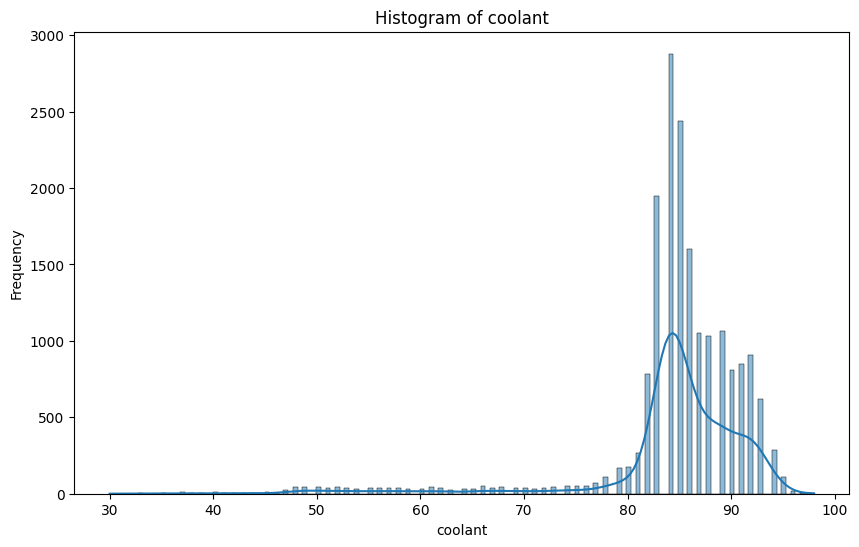

In [74]:
# Generating histogram for 'coolant' variable.
plt.figure(figsize=(10, 6))
sns.histplot(df_new['coolant'], kde=True)
plt.title('Histogram of coolant')
plt.xlabel('coolant')
plt.ylabel('Frequency')
plt.show()

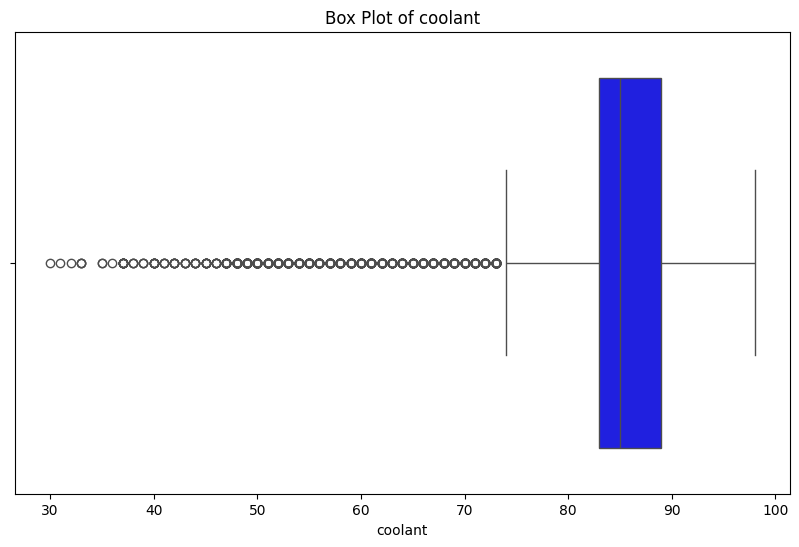

In [77]:
# Generating box plot for 'coolant'
plt.figure(figsize=(10, 6))
sns.boxplot(x = df_new['coolant'], color= 'blue')
plt.title('Box Plot of coolant')
plt.xlabel('coolant')
plt.show()

We can see in histogram of coolant that higher concentration of the values lie between 80 to 95 percent. However, the range starts from nearly 30 % but still temperatures are mostly on higher sides.  From the coolant box plot, we can see that there is significant number of outliers in their values. it is also seen from the plot that 50 % times the temperature are above the 85%.

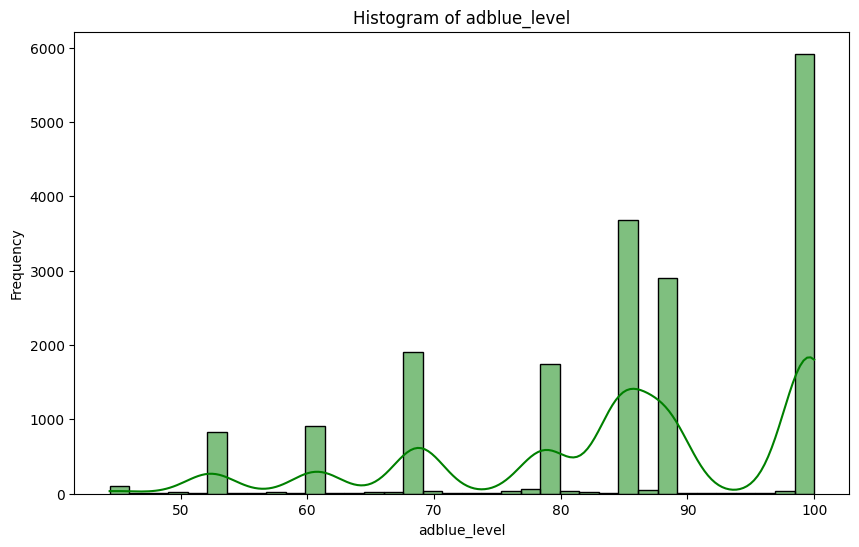

In [79]:
# Generating histogram for 'adblue_level' variable.
plt.figure(figsize=(10, 6))
sns.histplot(df_new['adblue_level'], kde=True, color= 'green')
plt.title('Histogram of adblue_level')
plt.xlabel('adblue_level')
plt.ylabel('Frequency')
plt.show()

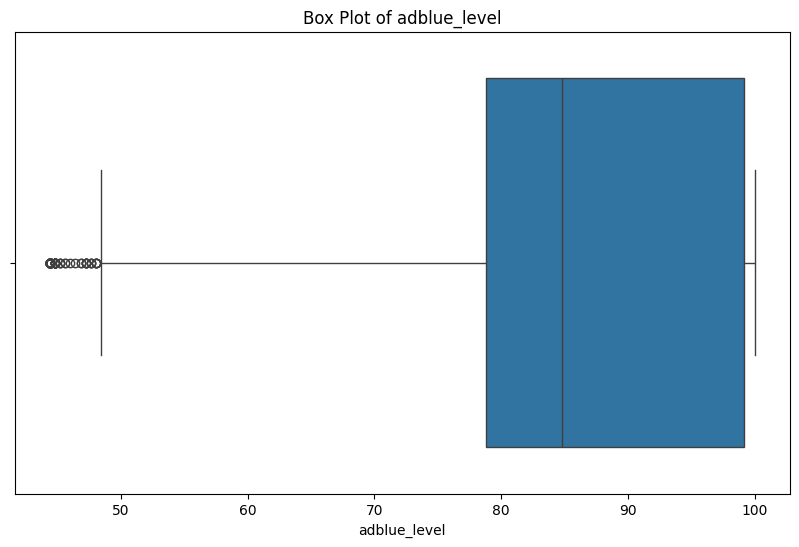

In [139]:
# Generating box plot for 'adblue_level'
plt.figure(figsize=(10, 6))
sns.boxplot(x = df_new['adblue_level'])
plt.title('Box Plot of adblue_level')
plt.xlabel('adblue_level')
plt.show()

From the histogram and box plot, we can say that most of the time the adblue level is 100 % full. and nearly 50 % times, the adblue level is more than 80% full. It is also evident from the box plot that the significant number of outliers are also there.

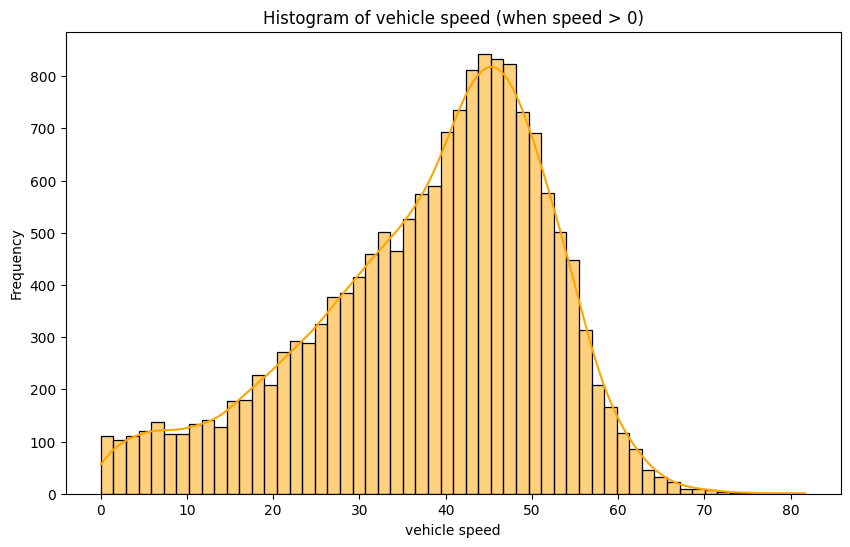

In [80]:
# Generating histogram for 'vehiclespeed' when speed is greater than zero
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['vehiclespeed'], kde=True, color= 'orange')
plt.title('Histogram of vehicle speed (when speed > 0)')
plt.xlabel('vehicle speed')
plt.ylabel('Frequency')
plt.show()

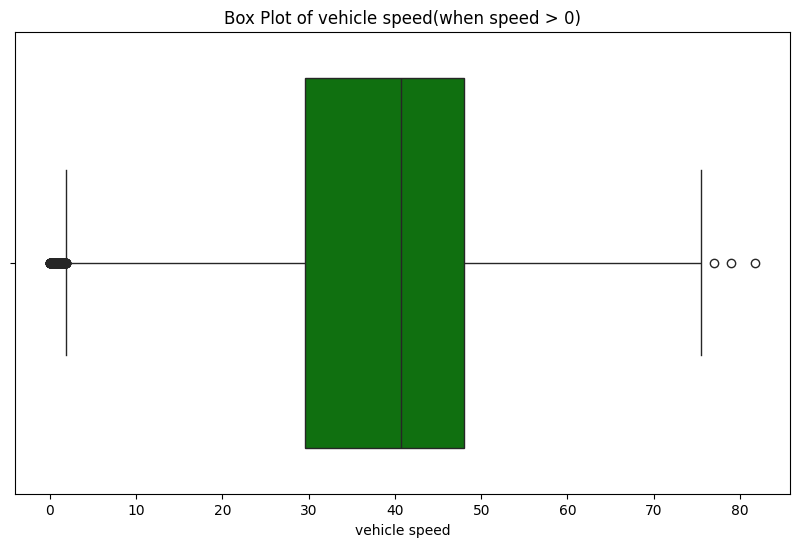

In [81]:
# Generating box plot for 'vehiclespeed' when speed is greater than zero
plt.figure(figsize=(10, 6))
sns.boxplot(x = df_filtered['vehiclespeed'], color= 'green')
plt.title('Box Plot of vehicle speed(when speed > 0)')
plt.xlabel('vehicle speed')
plt.show()

I have done the calculation on vehicle speed only when speed is greater than zero, to get better analysis. Frequency of vehicle speed form very smooth curve. It has very symmetric values. Approximately 50% times, it is found that the speed lie between 30 and 50 km/hr.

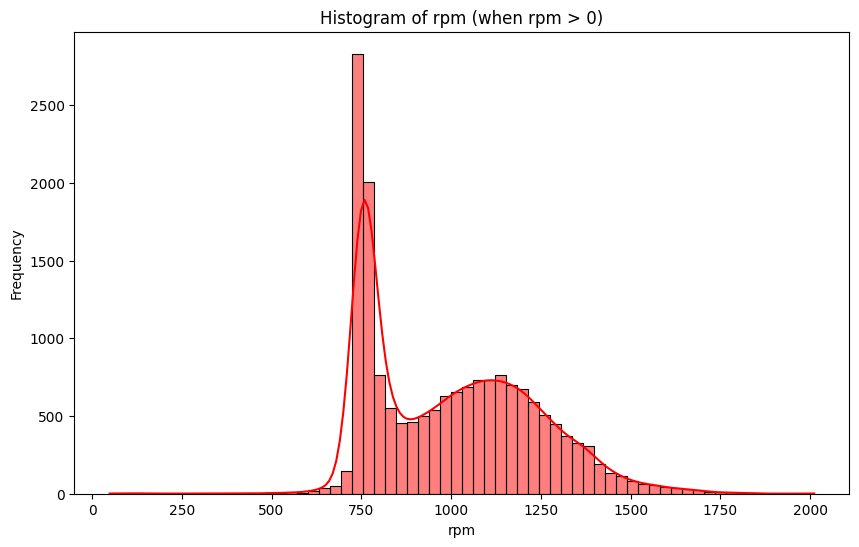

In [82]:
# Generating histogram for 'rpm' when it is greater than zero
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered1['rpm'], kde=True, color= 'red')
plt.title('Histogram of rpm (when rpm > 0)')
plt.xlabel('rpm')
plt.ylabel('Frequency')
plt.show()

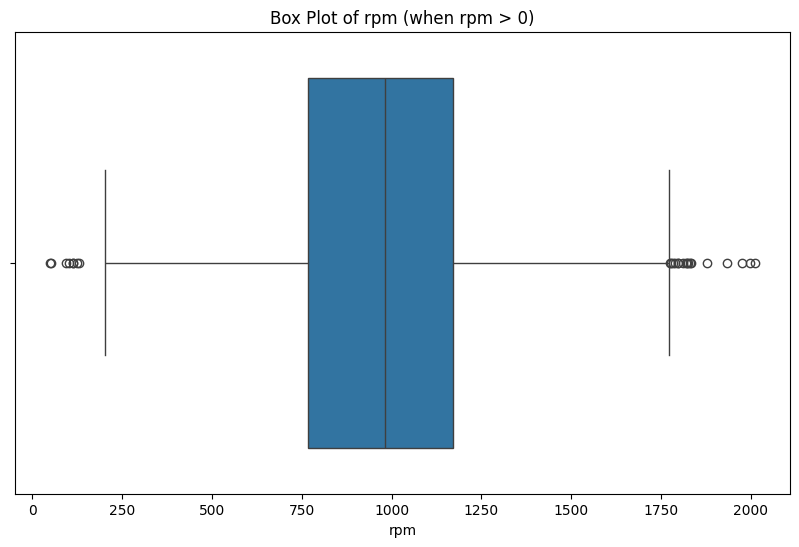

In [59]:
# Generating box plot for 'rpm' when it is greater than zero
plt.figure(figsize=(10, 6))
sns.boxplot(x = df_filtered1['rpm'])
plt.title('Box Plot of rpm (when rpm > 0)')
plt.xlabel('rpm')
plt.show()

Despite the range is broader, but nearly 50% times the Revolutions Per Minute (RPM) lie between 750 and 1250. around 750 RPM is most likely to repeat. There are signeficant number of outliers also.

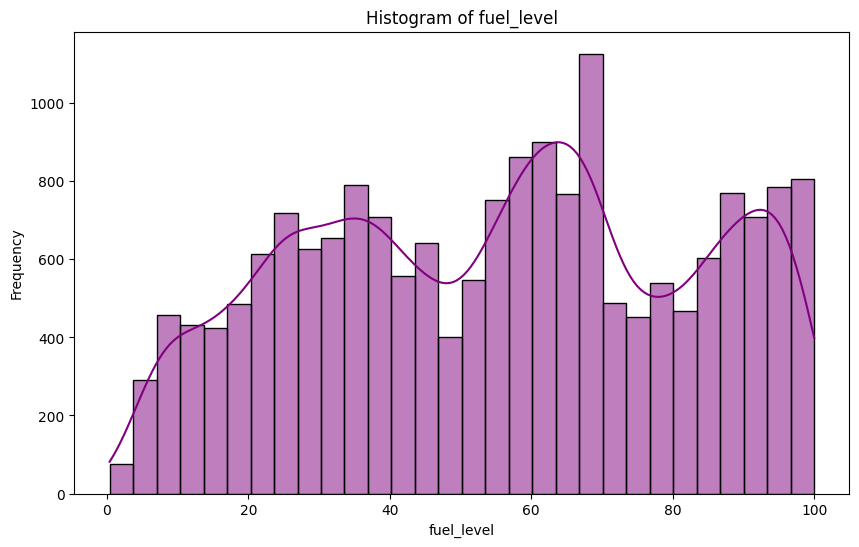

In [83]:
# Generating histogram for 'fuel_level' variable.
plt.figure(figsize=(10, 6))
sns.histplot(df_new['fuel_level'], kde=True, color= 'purple')
plt.title('Histogram of fuel_level')
plt.xlabel('fuel_level')
plt.ylabel('Frequency')
plt.show()

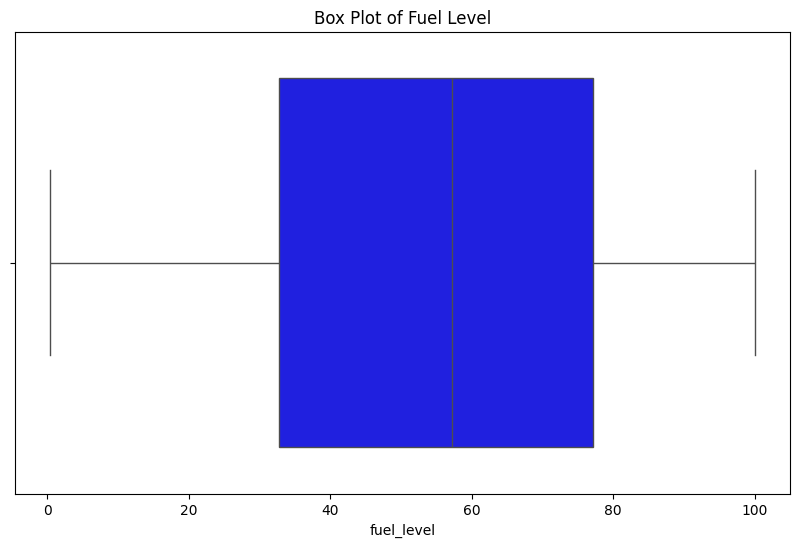

In [84]:
# Generating box plot for 'fuel_level' 
plt.figure(figsize=(10, 6))
sns.boxplot(x = df_new['fuel_level'], color= 'blue')
plt.title('Box Plot of Fuel Level')
plt.xlabel('fuel_level')
plt.show()

The frequency of fuel level is well distributed. the level of fuel in tank found from 0% to 100%. the frequncy across all the range of fuel level is nearly similar. 50% times, the fuel level lie between 35 to 80 percent of tank capacity.

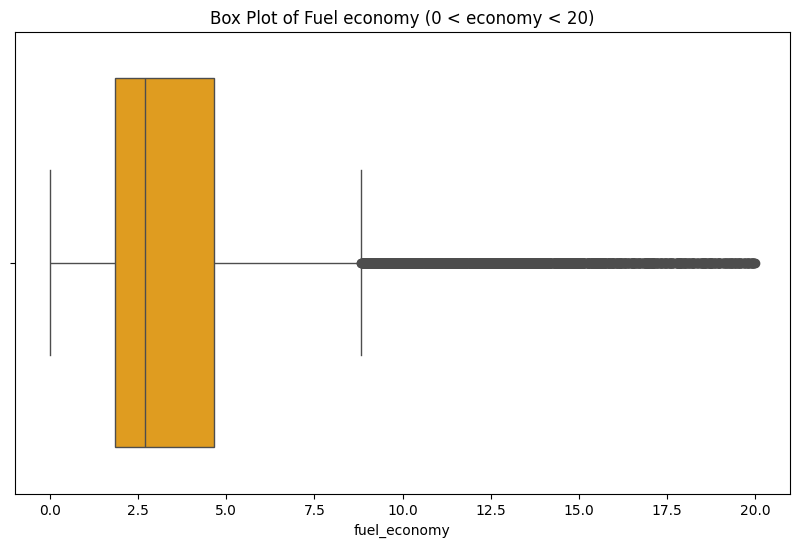

In [147]:
# Generating box plot for 'fuel_economy' in km/L 
plt.figure(figsize=(10, 6))
sns.boxplot(x = df_economy_filtered['fuel_economy'], color= 'orange')
plt.title('Box Plot of Fuel economy (0 < economy < 20)')
plt.xlabel('fuel_economy')
plt.show()

From the above graph, it is found that there is large amount of outliers. the 50% times, the fuel economy lie between 0 and 3. and the average fuel economy is nealy 4.5 km/l from the graph.

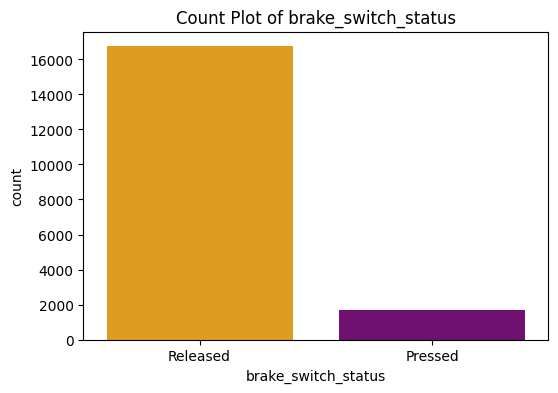

In [103]:
# Plotting the counts for categorical data
#for 'brake_switch_status' variable
plt.figure(figsize=(6, 4))
sns.countplot(x=df_new['brake_switch_status'], hue=df_new['brake_switch_status'], palette=['orange', 'purple'], dodge=False)
plt.title('Count Plot of brake_switch_status')
plt.legend([],[], frameon=False)  
plt.show()


From the above graph, it is found that most of the time brake is released. and very few frequency of pressed brake found. It is also evident from the graph is that nearly 10% times the brake was pressed.

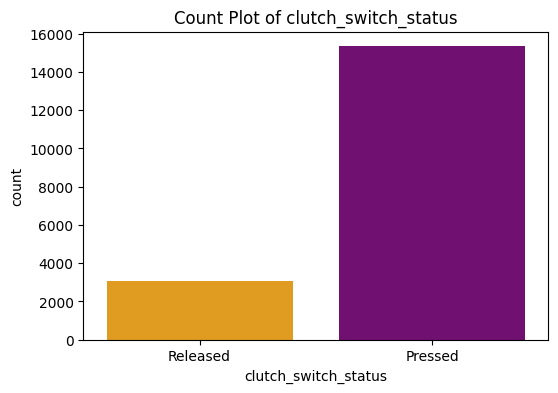

In [104]:
#for 'clutch_switch_status' variable
plt.figure(figsize=(6, 4))
sns.countplot(x=df_new['clutch_switch_status'], hue= df_new['clutch_switch_status'], palette= ['orange', 'purple'], dodge=False)
plt.title('Count Plot of clutch_switch_status')
plt.legend([],[], frameon=False) 
plt.show()

From the above graph, it is found that most of the time the clutch of the vehicle is pressed. and very few frequency of released clutch found. Nearly, 80% times the clutch was found to be pressed.

__Bivariate Analysis__

Bivariate analysis involves examining the relationships between two variables to understand how they influence each other.

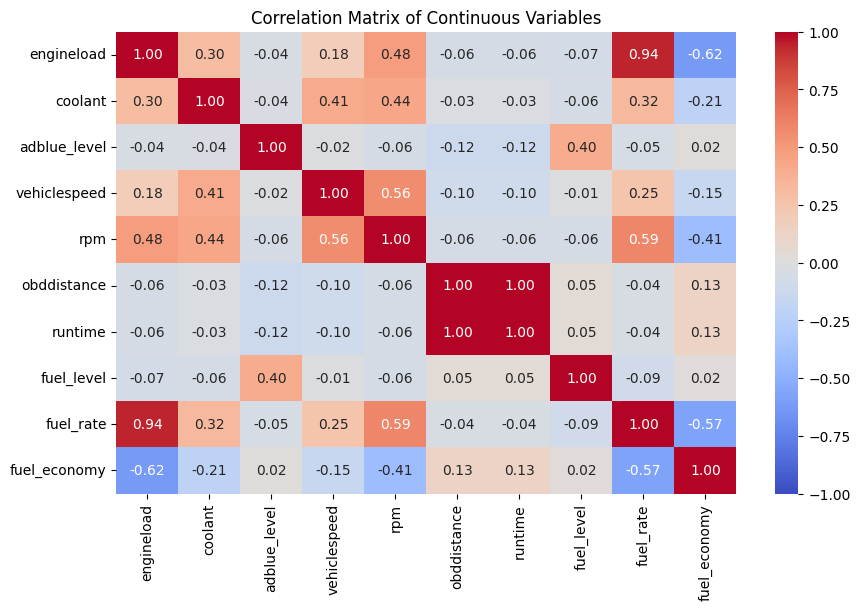

In [145]:
# Finding the correlation matrix for numerical variables
corr_matrix = df_new[['engineload', 'coolant', 'adblue_level', 'vehiclespeed', 'rpm', 'obddistance', 'runtime', 'fuel_level', 'fuel_rate', 'fuel_economy']].corr()

# Ploting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

From the above heatmap, there are many correlations found for numerical varaibles. like,  <br>
1. Engine load vs fuel rate <br>
2. fuel rate vs RPM <br>
3. RPM vs vehicle speed <br>
4. fuel economy vs engine load <br>
<br>
We can analyse the relationship between- <br>
1. datetime vs fuel level <br>
2. runtime vs obddistance <br>
<br>
To analyse the relationship between a continuous variable and a categorical variable, we can do betwwen- <br>
1. Vehicle Speed vs Brake Switch Status <br>
2. Engine Load vs Clutch Switch Status

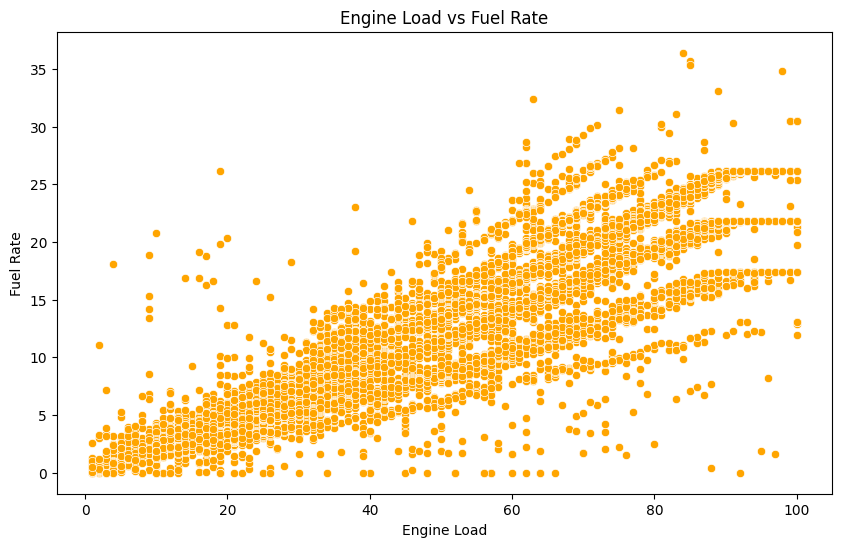

In [113]:
# Scatter plot for 'engineload' vs 'fuel_rate'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engineload', y='fuel_rate', data= engineload_filtered, color= 'orange')
plt.title('Engine Load vs Fuel Rate')
plt.xlabel('Engine Load')
plt.ylabel('Fuel Rate')
plt.show()

It is evident from the above graph that by increasing the engine load (filtered, > 0), fuel rate increases automatically.

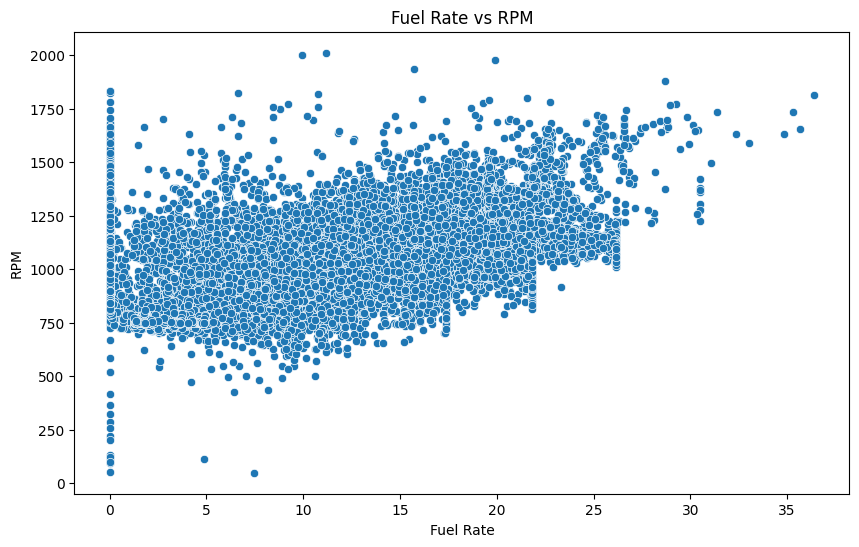

In [110]:
# Scatter plot for 'fuel_rate' vs 'rpm'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fuel_rate', y='rpm', data=df_filtered1)
plt.title('Fuel Rate vs RPM')
plt.xlabel('Fuel Rate')
plt.ylabel('RPM')
plt.show()

With incresing rpm (filtered, when > 0), fuel rate also increses. 

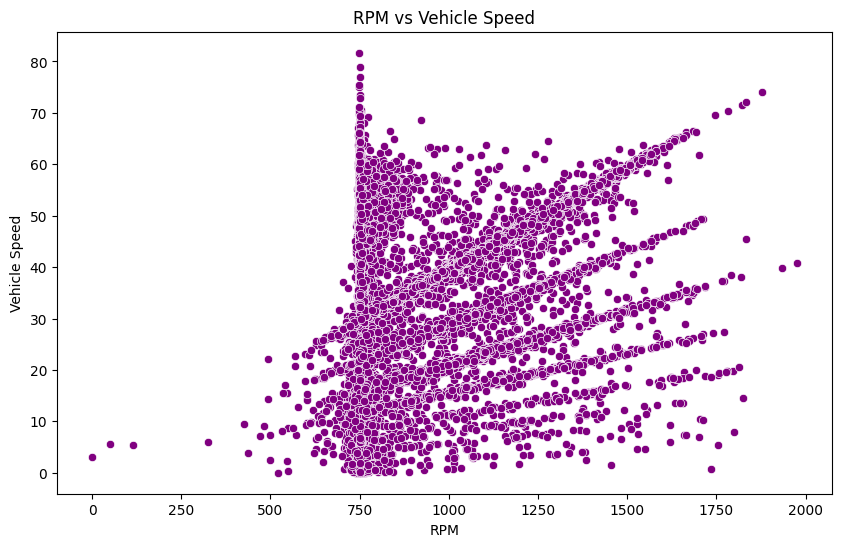

In [116]:
# Scatter plot for 'rpm' vs 'vehiclespeed'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rpm', y='vehiclespeed', data=df_filtered, color= 'purple')
plt.title('RPM vs Vehicle Speed')
plt.xlabel('RPM')
plt.ylabel('Vehicle Speed')
plt.show()

From this graph, we can conclude that sometimes even vehicle speed increses but rpm still around 750. But generally, we are getting a trend that with incresing vehicle speed, RPM also increses.

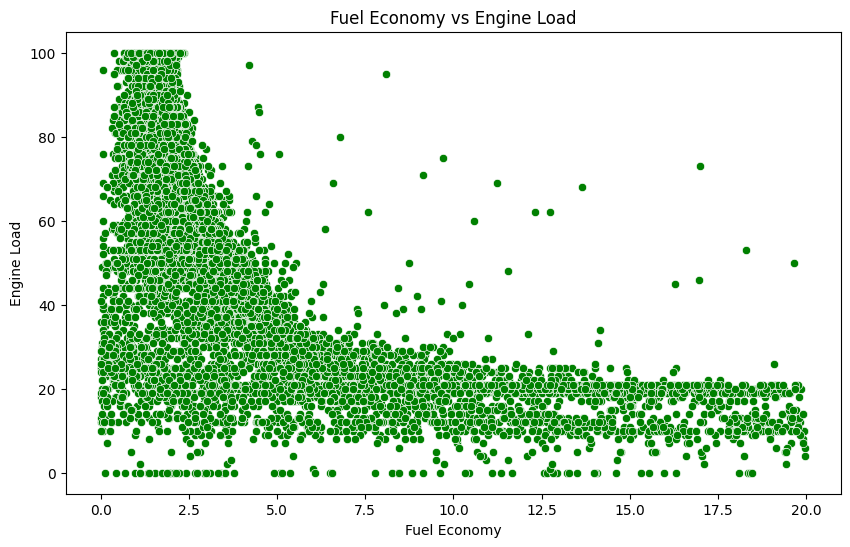

In [118]:
# Scatter plot for 'fuel_economy' vs 'engineload'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fuel_economy', y='engineload', data=df_economy_filtered, color= 'green')
plt.title('Fuel Economy vs Engine Load')
plt.xlabel('Fuel Economy')
plt.ylabel('Engine Load')
plt.show()

From the above scatter plot, As the engine load increases, the fuel economy tends to decrease. here fuel economy is filtered on the condition when economy is between 0 and 20.

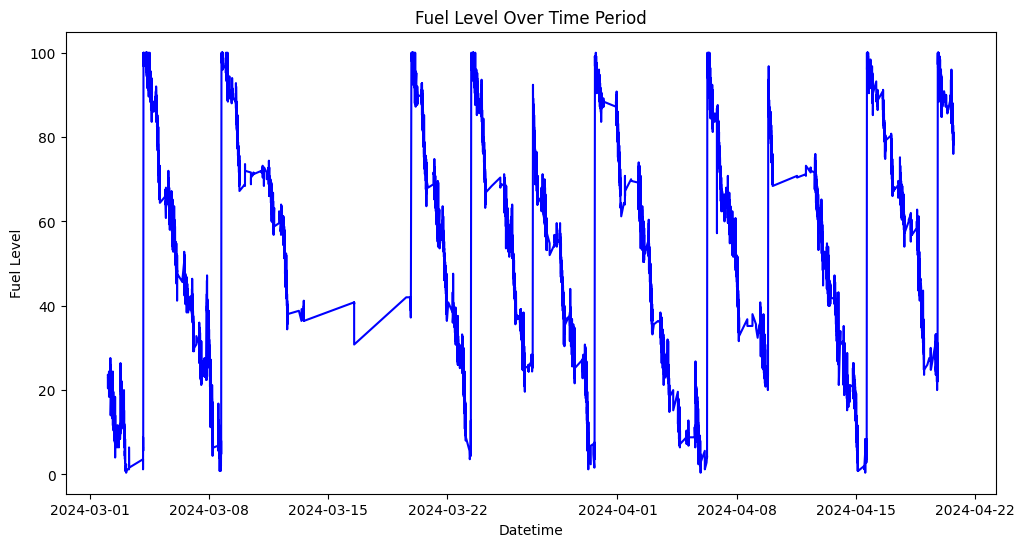

In [119]:
# Line plot for 'datetime' vs 'fuel_level'
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='fuel_level', data=df_new, color= 'blue')
plt.title('Fuel Level Over Time Period')
plt.xlabel('Datetime')
plt.ylabel('Fuel Level')
plt.show()

In this Line plot, there are many fluctuations in fuel level seen over period of time.

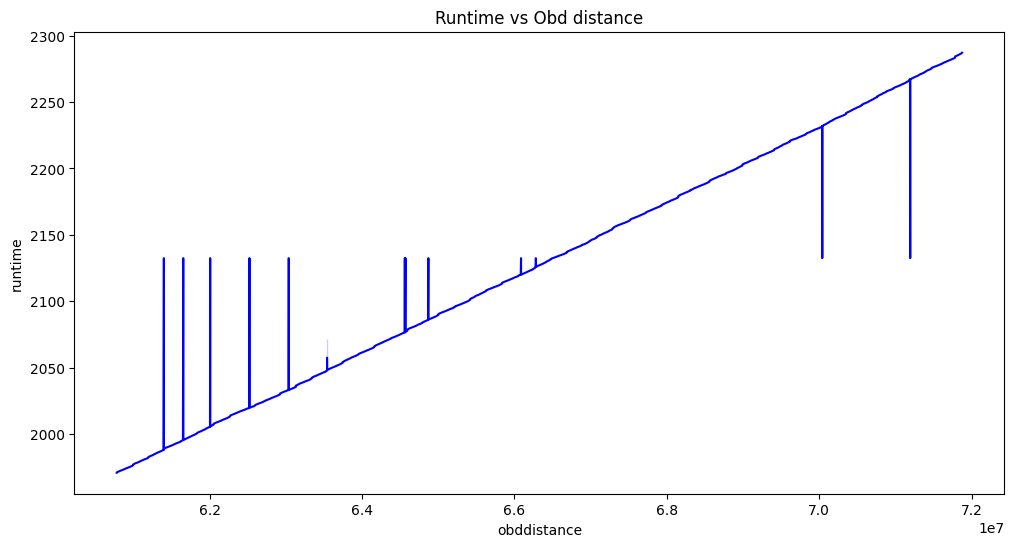

In [146]:
# Line plot for 'obddistance' vs 'runtime'
plt.figure(figsize=(12, 6))
sns.lineplot(x='obddistance', y='runtime', data=df_new, color= 'blue')
plt.title('Runtime vs Obd distance')
plt.xlabel('obddistance')
plt.ylabel('runtime')
plt.show()

From the above graph, it is evident that runtime is linearly proportion to OBD distance.

C:\Users\Asus\AppData\Local\Temp\ipykernel_2992\3443517056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brake_switch_status', y='vehiclespeed', data=df_new, palette= ['orange', 'red'])


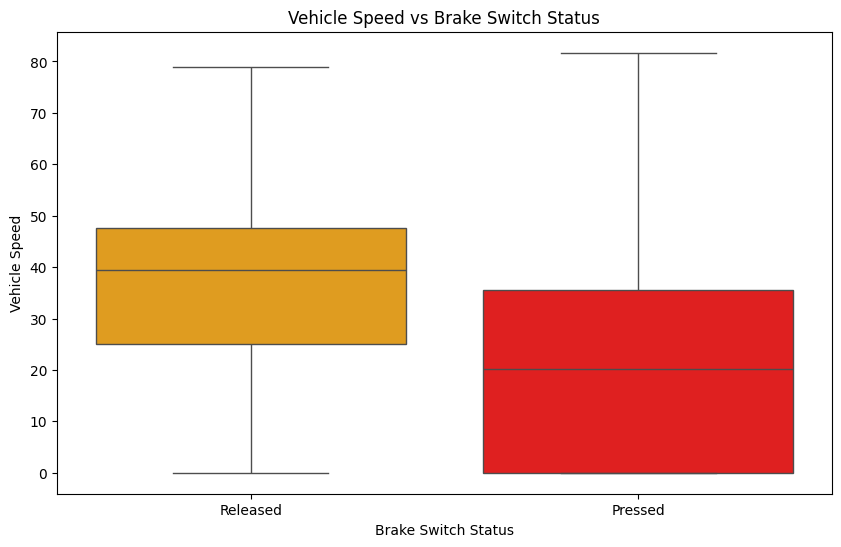

In [123]:
# Box plot for 'vehiclespeed' vs 'brake_switch_status'
plt.figure(figsize=(10, 6))
sns.boxplot(x='brake_switch_status', y='vehiclespeed', data=df_new, palette= ['orange', 'red'])
plt.title('Vehicle Speed vs Brake Switch Status')
plt.xlabel('Brake Switch Status')
plt.ylabel('Vehicle Speed')
plt.show()

It is clearly visibile from the above boxplot that with low vehicle speed, brakes are mostly pressed. and by incresing the speed, brakes are released.

C:\Users\Asus\AppData\Local\Temp\ipykernel_2992\1175573622.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clutch_switch_status', y='engineload', data=df_new, palette= ['purple', 'blue'] )


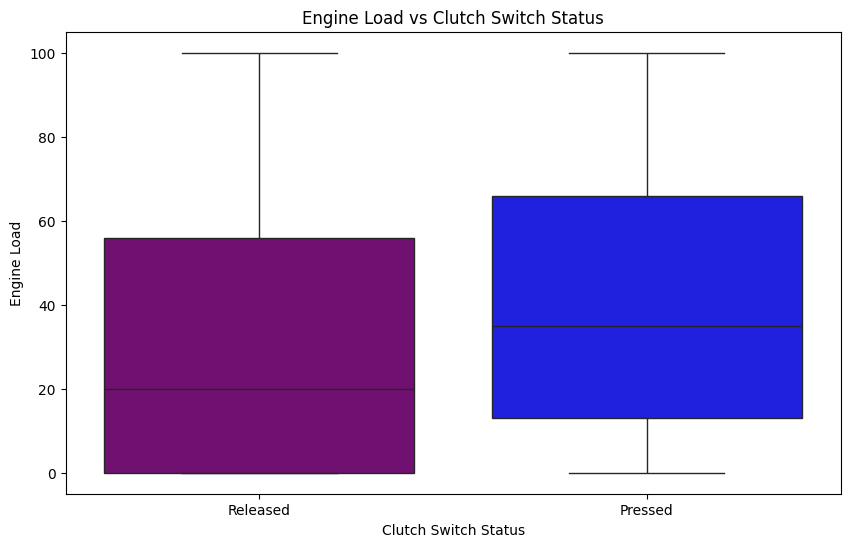

In [124]:
# Box plot for 'engineload' vs 'clutch_switch_status'
plt.figure(figsize=(10, 6))
sns.boxplot(x='clutch_switch_status', y='engineload', data=df_new, palette= ['purple', 'blue'] )
plt.title('Engine Load vs Clutch Switch Status')
plt.xlabel('Clutch Switch Status')
plt.ylabel('Engine Load')
plt.show()

From this plot, by pressing the clutch, engine load automatically increases. Whereas, with releasing the clutch, engine load also decreases.

### __4. Feature Engineering__

Feature Engineering is the process of creating new features or transforming existing features to improve the performance

In [125]:
df_new.head()


,datetime,engineload,coolant,adblue_level,vehiclespeed,rpm,obddistance,runtime,fuel_level,fuel_rate,fuel_economy,brake_switch_status,clutch_switch_status,obddistance_adjusted,runtime_adjusted
0,2024-03-02 00:52:11,28,33,84.795315,0.00000,749.000,60780800,1970.85,23.6,5.30,0.000000,Released,Released,0.00,0.00
1,2024-03-02 00:53:14,22,41,84.795315,0.00000,1208.375,60780800,1970.85,23.6,6.45,0.000000,Released,Pressed,0.00,0.00
2,2024-03-02 00:54:17,25,48,84.795315,1.40625,752.625,60780800,1970.85,22.8,4.70,0.337891,Pressed,Pressed,0.00,0.00
3,2024-03-02 00:55:20,35,52,84.795315,2.81250,996.375,60780820,1970.90,20.4,8.60,0.121094,Released,Pressed,0.02,0.05
4,2024-03-02 00:56:23,0,57,84.795315,4.53125,1065.750,60780840,1970.90,23.2,0.00,125.500000,Released,Pressed,0.04,0.05


_Creating the new features_

By using Fuel Level × Fuel Economy, we can get the remaining distance vehicle can travel

In [127]:
# creating new feature that is remaining distance with the help of multiplying fuel level and fuel economy.
df_new.loc[:, 'remaining_distance'] = df_new['fuel_level'] * df_new['fuel_economy']
print(df_new[['fuel_level', 'fuel_economy', 'remaining_distance']].head())

   fuel_level  fuel_economy  remaining_distance
0        23.6      0.000000            0.000000
1        23.6      0.000000            0.000000
2        22.8      0.337891            7.703906
3        20.4      0.121094            2.470312
4        23.2    125.500000         2911.600000


In [128]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

_Standardize the feature_

In [129]:
scaler = StandardScaler()
df_new.loc[:, ['fuel_level', 'fuel_economy', 'remaining_distance']] = scaler.fit_transform(df_new[['fuel_level', 'fuel_economy', 'remaining_distance']])


_Normalize features_

In [130]:
normalizer = MinMaxScaler()
df_new.loc[:, ['fuel_level', 'fuel_economy', 'remaining_distance']] = normalizer.fit_transform(df_new[['fuel_level', 'fuel_economy', 'remaining_distance']])

In [131]:
# Display the standardized and normalized features
print(df_new[['fuel_level', 'fuel_economy', 'remaining_distance']].head())

   fuel_level  fuel_economy  remaining_distance
0    0.232932      0.000000            0.000000
1    0.232932      0.000000            0.000000
2    0.224900      0.002692            0.000614
3    0.200803      0.000965            0.000197
4    0.228916      1.000000            0.232000


In [132]:
df_new.head()

,datetime,engineload,coolant,adblue_level,vehiclespeed,rpm,obddistance,runtime,fuel_level,fuel_rate,fuel_economy,brake_switch_status,clutch_switch_status,obddistance_adjusted,runtime_adjusted,remaining_distance
0,2024-03-02 00:52:11,28,33,84.795315,0.00000,749.000,60780800,1970.85,0.232932,5.30,0.000000,Released,Released,0.00,0.00,0.000000
1,2024-03-02 00:53:14,22,41,84.795315,0.00000,1208.375,60780800,1970.85,0.232932,6.45,0.000000,Released,Pressed,0.00,0.00,0.000000
2,2024-03-02 00:54:17,25,48,84.795315,1.40625,752.625,60780800,1970.85,0.224900,4.70,0.002692,Pressed,Pressed,0.00,0.00,0.000614
3,2024-03-02 00:55:20,35,52,84.795315,2.81250,996.375,60780820,1970.90,0.200803,8.60,0.000965,Released,Pressed,0.02,0.05,0.000197
4,2024-03-02 00:56:23,0,57,84.795315,4.53125,1065.750,60780840,1970.90,0.228916,0.00,1.000000,Released,Pressed,0.04,0.05,0.232000


### __Conclusions__

1. 108 out of 141 columns have all null values which are droped. 'adblue_level', 'fuel_level', and 'runtime' have few null value which are filled using mean and median. <br>
2. Descriptive statistics like minimum, maximum, mean, median, mode, standard deviation, and skewness are calculated for numerical variables. <br>
3. Vehicle Speed: symmetric values, 50% times between 30 and 50 km/hr. <br>
4. Fuel Level: 50% times between 40-80% of tank capacity. <br>
5. Fuel Economy: the average fuel economy is approximately 5. <br>
6. Adblue Level: Most of the time 100% full. <br>
7. RPM: 50% times between 750 and 1250, around 750 RPM most frequent. <br>
8. Coolant: Higher concentration between 80-95%. <br>
9. Brake Status: Mostly released, 10% times pressed. <br>
10. Clutch Status: Mostly pressed, 20% times released.<br>
11. Found that the brakes pressed at low speeds, released at higher speeds. <br>
12. Engine load increases with clutch pressed, decreases when released. <br>
13. Fluctuations in fuel level over time period. <br>
14. With increasing the engine load, fuel rate increases also. <br>
15. With incresing rpm, fuel rate also increases. <br>
16. with incresing vehicle speed, RPM also increases. <br>
17. As the engine load increases, the fuel economy tends to decrease. <br>
18. Runtime of the engine is directly linear proportional to OBD distance.
